From what I could deduce from the narrative of the data set, the aim of the data set is to know the impact of generating plant on the climate change due to the usage of fuel to generate electricity over the years. From this summary i could make the conclusion that the following features should be explored:
1. To explore the operating cost of each power plant
2. To see and show how fuel costs impact viability of different generation sources (fuel types)
3. To highlight the competetiveness of renewable electricity
4. To show how general mix of different utilities evolved over time (i.e. over the years)


1. How do I calculate the Operating Costs of each power plant from the given features/columns
2. How will I be able to highlight the competetiveness of renewable electricity as no renewable source of electricity was given in the data set
3. What is the usefulness of the Utility ID
4. Is fuel costs the same as the operating cost of the various plants?

So please anyone that can help should please tag me so that i can easily see the solutions u proffer and if i'm not asking the right questions please someone should let me know

Now, for every point you made, I will talk about it in the same numbering:

    I don't know much about the plant they are talking about. Could it be that these plants produce the fuel or they consume the fuel to produce another product. What do you think about it? I think they are plants that consume fuel to produce something else and the type of fuel they consume to produce their products.
    I don't really understand what you mean here - "How will I be able to highlight the competitiveness of renewable electricity as no renewable sources of electricity as no renewable sources of electricity was given in the dataset"
    I think utility ID is as good as the record_id, it can't be used to predictive anything. It's plain nominal. We might be able to use it to infer though like to see how often a plant gets assigned an utility_id and maybe then create a different dataframe with a new variable called "number of utility_id" to order plants with more utility_id over ones with lesser. With this and the type of fuel each plants uses, we can know the "kind of plants", "individual plants" and even "type of fuel" that affects the environment.
    Fuel cost could be same as operating cost for each plant but could that be the only cost in their operations considering what I think about the data.



## 1. Import dependencies

In [2]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

## 2. Read in data via url link provided

In [3]:
fuel_data = pd.read_csv("https://bit.ly/HDSC-StageOneDataset", error_bad_lines=False)

In [8]:
# Write to disk for further use
fuel_data.to_csv("fuel_quality.csv", index=False)

## 3. Examination of data

#### (a) Dataset Description
The data provided in this Github link <b><u>is the fuel quality data</u></b> from the Federal Energy Regulatory Commission which is provided by the United States Energy Information Administration. The data consists of the following columns:<br>
* **Record_id** : record id
* **Utility_id_ferc1**: Utility id assigned by the FERC
* **Report_year**: year of report
* **Plant_name_ferc1**: the name of the plant
* **Fuel_type_code_pudl**: the type of fuel
* **Fuel_unit**: the unit of fuel
* **Fuel_qty_burned**: the quantity of fuel burned
* **Fuel_mmbtu_per_unit**: the measure of energy per unit
* **fuel_cost_per_unit_burned**: the fuel cost per unit burned
* **Fuel_cost_per_unit_delivered**: the cost of fuel delivered per unit
* **fuel_cost_per_mmbtu**: the cost of fuel per mmbtu


In [4]:
fuel_data.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


#### (b) Check for completeness

In [5]:
fuel_data.shape

(29523, 11)

In [5]:
fuel_data.columns.tolist()

['record_id',
 'utility_id_ferc1',
 'report_year',
 'plant_name_ferc1',
 'fuel_type_code_pudl',
 'fuel_unit',
 'fuel_qty_burned',
 'fuel_mmbtu_per_unit',
 'fuel_cost_per_unit_burned',
 'fuel_cost_per_unit_delivered',
 'fuel_cost_per_mmbtu']

#### (c) Check for quality of data

In [11]:
#### See details in section for Data Types

In [12]:
# Unique records, Missing data
for column in fuel_data.columns:
    input_ = fuel_data[column].unique()
    if (fuel_data[column].dtype == np.object) and (input_.size <= 10):
        print("{:<32s}".format(column), input_)
#         print("test".rjust(37), '\n')
    else:
        input_ = str(input_.size) + " unique records"
        print("{:<32s}".format(column), input_)
    print("{:>32s}".format(' '),fuel_data[column].isnull().sum(), "missing data")
    print('-'*60)

record_id                        29523 unique records
                                 0 missing data
------------------------------------------------------------
utility_id_ferc1                 185 unique records
                                 0 missing data
------------------------------------------------------------
report_year                      25 unique records
                                 0 missing data
------------------------------------------------------------
plant_name_ferc1                 2315 unique records
                                 0 missing data
------------------------------------------------------------
fuel_type_code_pudl              ['coal' 'gas' 'nuclear' 'oil' 'waste' 'other']
                                 0 missing data
------------------------------------------------------------
fuel_unit                        ['ton' 'mcf' 'kgU' 'bbl' 'gramsU' nan 'mwdth' 'mmbtu' 'mwhth' 'gal']
                                 180 missing data
-------------

In [6]:
fuel_data.report_year.unique()

array([1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018])

In [7]:
print("There are", fuel_data.duplicated().sum(), "duplicated records")

There are 0 duplicated records


## 4. Data types

The data provided in this Github link <b><u>is the fuel quality data</u></b> from the Federal Energy Regulatory Commission 
* **Record_id** : record id
* **Utility_id_ferc1**: Utility id assigned by the FERC
* **Report_year**: year of report
* **Plant_name_ferc1**: the name of the plant
* **Fuel_type_code_pudl**: the type of fuel
* **Fuel_unit**: the unit of fuel
* **Fuel_qty_burned**: the quantity of fuel burned
* **Fuel_mmbtu_per_unit**: the measure of energy per unit
* **fuel_cost_per_unit_burned**: the fuel cost per unit burned
* **Fuel_cost_per_unit_delivered**: the cost of fuel delivered per unit
* **fuel_cost_per_mmbtu**: the cost of fuel per mmbtu


In [8]:
def range_category(column):
    input_ = fuel_data[column]
    if input_.dtype == np.object:
        if input_.unique().size <=10:
            output = ','.join(map(str, input_.unique()))
        else:
            output = f"{input_.unique().size:,} unique records"
        return output
    
    else:
        min_ = fuel_data[column].min()
        max_ = fuel_data[column].max()
        range_ = max_ - min_
        output = f"{min_:,.1f} -- {max_:,.1f} ({range_:,.1f})"
        return output
    
data_class = [
    'Categorical_Norminal',
    'Categorical_Norminal',
    'Numerical_interval scale',
    'Categorical_Norminal',
    'Categorical_Norminal',
    'Categorical_Norminal',
    'Numerical_ratio scale',
    'Numerical_ratio scale',
    'Numerical_ratio scale',
    'Numerical_ratio scale',
    'Numerical_ratio scale'
]

description = [
    'record id',
    'Utility id assigned by the FERC',
    'year of report',
    'the name of the plant',
    'the type of fuel',
    'the unit of fuel',
    'the quantity of fuel burned',
    'the measure of energy per unit',
    'the fuel cost per unit burned',
    'the cost of fuel delivered per unit',
    'the cost of fuel per mmbtu'
]

In [9]:
data_types = fuel_data.dtypes.to_frame().rename(columns={0:"Data type"})
data_types['Data class'] = data_class
data_types['description'] = description
data_types['range/categories'] = [range_category(column) for column in fuel_data.columns]
data_types['missing_data'] = [fuel_data[column].isnull().sum() for column in fuel_data.columns]
data_types

,Data type,Data class,description,range/categories,missing_data
record_id,object,Categorical_Norminal,record id,"29,523 unique records",0
utility_id_ferc1,int64,Categorical_Norminal,Utility id assigned by the FERC,1.0 -- 514.0 (513.0),0
report_year,int64,Numerical_interval scale,year of report,"1,994.0 -- 2,018.0 (24.0)",0
plant_name_ferc1,object,Categorical_Norminal,the name of the plant,"2,315 unique records",0
fuel_type_code_pudl,object,Categorical_Norminal,the type of fuel,"coal,gas,nuclear,oil,waste,other",0
fuel_unit,object,Categorical_Norminal,the unit of fuel,"ton,mcf,kgU,bbl,gramsU,nan,mwdth,mmbtu,mwhth,gal",180
fuel_qty_burned,float64,Numerical_ratio scale,the quantity of fuel burned,"1.0 -- 555,894,250.0 (555,894,249.0)",0
fuel_mmbtu_per_unit,float64,Numerical_ratio scale,the measure of energy per unit,0.0 -- 341.3 (341.3),0
fuel_cost_per_unit_burned,float64,Numerical_ratio scale,the fuel cost per unit burned,"-276.1 -- 139,358.0 (139,634.1)",0
fuel_cost_per_unit_delivered,float64,Numerical_ratio scale,the cost of fuel delivered per unit,"-874.9 -- 7,964,521.0 (7,965,395.9)",0


## 5. Transform: for Quality

<pre><u>Issues affecting quality of data</u>:
    1. 180 missing values in <b>fuel_unit</b>
    2. <u>Negative values</u> in <b>fuel_cost_per_unit_burned, fuel_cost_per_unit_delivered, and 
        fuel_cost_per_mmbtu</b>
<pre>

In [10]:
fuel_data.describe(include=np.object)

,record_id,plant_name_ferc1,fuel_type_code_pudl,fuel_unit
count,29523,29523,29523,29343
unique,29523,2315,6,9
top,f1_fuel_1999_12_87_0_13,big stone,gas,mcf
freq,1,156,11486,11354


In [11]:
# Which fuel_type has a  MISSING value for its unit of measurement
fuel_data[fuel_data.fuel_unit.isna()].fuel_type_code_pudl.unique()

array(['oil', 'nuclear', 'other', 'gas', 'coal', 'waste'], dtype=object)

In [12]:
# Unique values for fuel types
fuel_data.fuel_type_code_pudl.unique()

array(['coal', 'gas', 'nuclear', 'oil', 'waste', 'other'], dtype=object)

<pre>as we can see from the foregoing, all fuel types have missing value(s) for their units</pre>

In [13]:
# Let's groupby fuel type and their respective units
df_fuel_unit_count = fuel_data.groupby(['fuel_type_code_pudl', 'fuel_unit']
                                      ).fuel_unit.count().to_frame().rename(columns={"fuel_unit":"Counts"})
df_fuel_unit_count
# Note: the Nan values are not captured

Counts
fuel_type_code_pudl fuel_unit        
coal                bbl             1
                    mcf             5
                    mmbtu          52
                    ton          8438
gas                 bbl             2
                    mcf         11333
                    mmbtu          94
                    ton             4
nuclear             gramsU        464
                    kgU           110
                    mmbtu          34
                    mwdth          95
                    mwhth         100
oil                 bbl          7952
                    gal            81
                    mcf             7
                    ton             3
other               bbl            42
                    gal             3
                    mcf             9
                    ton            77
waste               bbl             1
                    ton           436

In [14]:
# temorarily fill-up NaN with some foo value inorder to capture those cells in the groupby
fuel_data.fillna('xxx').groupby(['fuel_type_code_pudl', 'fuel_unit']).record_id.count().to_frame()

record_id
fuel_type_code_pudl fuel_unit           
coal                bbl                1
                    mcf                5
                    mmbtu             52
                    ton             8438
                    xxx               51
gas                 bbl                2
                    mcf            11333
                    mmbtu             94
                    ton                4
                    xxx               53
nuclear             gramsU           464
                    kgU              110
                    mmbtu             34
                    mwdth             95
                    mwhth            100
                    xxx               15
oil                 bbl             7952
                    gal               81
                    mcf                7
                    ton                3
                    xxx               21
other               bbl               42
                    gal                3
                    mcf                9
                    ton               77
                    xxx               36
waste               bbl                1
                    ton              436
                    xxx                4

In [18]:
# testing out components of the intending function: return_most_common_unit
indx = pd.IndexSlice
col = 'coal'
temp = df_fuel_unit_count.loc[indx[col,:]].reset_index()
temp.loc[temp.Counts == temp.Counts.max(), 'fuel_unit'].tolist()[0]

'ton'

In [19]:
# Here we want to define a function that will return the most common unit per fuel type
# then we can later replace missing units per fuel type with this value

indx = pd.IndexSlice        # create a Pandas multi-index slice object

def return_most_common_unit(df_fuel_unit_count,indx, fuel_type):
    
    temp = df_fuel_unit_count.loc[indx[fuel_type, :]].reset_index()
    most_common_unit = temp.loc[temp.Counts == temp.Counts.max(), 'fuel_unit'].tolist()[0]
    
    return most_common_unit

# let's create a partial function to simplify the calls
most_common_unit = lambda fuel_type: return_most_common_unit(df_fuel_unit_count,indx, fuel_type)

In [20]:
# example
most_common_unit('gas')

'mcf'

In [21]:
# Now let's replace the issing values
for fuel_type in fuel_data.fuel_type_code_pudl.unique():
    fuel_data.loc[(fuel_data.fuel_type_code_pudl == fuel_type) 
                  & fuel_data.fuel_unit.isna(), 'fuel_unit'] = most_common_unit(fuel_type)
    
fuel_data.isna().any()

record_id                       False
utility_id_ferc1                False
report_year                     False
plant_name_ferc1                False
fuel_type_code_pudl             False
fuel_unit                       False
fuel_qty_burned                 False
fuel_mmbtu_per_unit             False
fuel_cost_per_unit_burned       False
fuel_cost_per_unit_delivered    False
fuel_cost_per_mmbtu             False
dtype: bool

In [66]:
!howdoi change the values of a column based on the values of another column pandas

import pandas
df = pandas.read_csv("test.csv")
df.loc[df.ID == 103, 'FirstName'] = "Matt"
df.loc[df.ID == 103, 'LastName'] = "Jones"


In [19]:
# At the moment, not sure what to do about these negative values, so just display and revisit later
fuel_data[['fuel_cost_per_unit_burned', 'fuel_cost_per_unit_delivered',
           'fuel_cost_per_mmbtu']][fuel_data.fuel_cost_per_mmbtu < 0]

,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
434,-35.100,-35.380,-3.003
516,-57.450,-58.800,-2.000
518,-57.490,-58.800,-1.959
520,-57.470,-58.800,-1.980
2117,-53.630,-53.560,-1.996
2119,-53.630,-53.560,-1.996
2121,-53.630,-53.560,-1.996
2123,-85.760,-85.640,-3.186
2125,-85.750,-85.640,-3.195
2334,-42.679,-42.290,-3.532


## 6. Transform: for Analysis

<pre>
    The values of these variables (or features) 
    [<b>fuel_qty_burned,
    fuel_mmbtu_per_unit,
    fuel_cost_per_unit_burned,
    fuel_cost_per_unit_delivered</b>],
    are not of the same unit of measurement.
    The different units are enumerated in the <b>fuel_unit</b> variable
    
    <u>So lets create new variables adjusting for uniformity of units</u></pre>

In [20]:
new_variables = ['n_fuel_energy_mmbtu',   # Energy produced in from fuel in mmbtu (1million British Thermal Unit)
                 'n_fuel_cost_burned',    # Cost of burning fuel
                 'n_fuel_cost_delivered'  # Cost of delivering the fuel
                ]
for column, variable in zip(fuel_data.columns[7:-1], new_variables):
    fuel_data[variable] = fuel_data.fuel_qty_burned * fuel_data[column]
    
fuel_data.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu,n_fuel_energy_mmbtu,n_fuel_cost_burned,n_fuel_cost_delivered
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121,8.921254e+07,9.996752e+07,9.964487e+07
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120,1.739994e+08,1.948474e+08,1.943231e+08
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650,7.187562e+07,1.183133e+08,1.135474e+08
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970,8.956064e+07,1.765410e+08,1.719789e+08
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570,4.053300e+04,1.122764e+05,1.122764e+05


In [22]:
# Descriptive stats of numerical features
fuel_data.describe()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.000000,29523.000000,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
mean,118.601836,2005.806050,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,74.178353,7.025483,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,1.000000,1994.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,55.000000,2000.000000,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,122.000000,2006.000000,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,176.000000,2012.000000,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000
max,514.000000,2018.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000


In [23]:
# Descriptive stats of non-numerical features
fuel_data.describe(include=np.object)

,record_id,plant_name_ferc1,fuel_type_code_pudl,fuel_unit
count,29523,29523,29523,29523
unique,29523,2315,6,9
top,f1_fuel_2011_12_95_1_5,big stone,gas,mcf
freq,1,156,11486,11407


In [25]:
# There are 6 categories of fuel types
print(fuel_data.fuel_type_code_pudl.unique())

['coal' 'gas' 'nuclear' 'oil' 'waste' 'other']


In [ ]:
fuel_quality.fuel_unit.value_counts()

In [ ]:
fuel_quality.fuel_unit = fuel_quality.fuel_unit.fillna(value='mcf')

In [ ]:
fuel_quality.isnull().values.any()

In [32]:
fuel_data.groupby('fuel_type_code_pudl').first()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
fuel_type_code_pudl,,,,,,,,,,
coal,f1_fuel_1994_12_1_0_7,1,1994,rockport,ton,5377489.0,16.590000,18.590,18.530,1.121
gas,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,mcf,40533.0,1.000000,2.770,2.770,2.570
nuclear,f1_fuel_1994_12_2_1_1,2,1994,joseph m. farley,kgU,2260.0,0.064094,28.770,0.000,0.450
oil,f1_fuel_1994_12_6_0_2,6,1994,clinch river,bbl,6510.0,5.875338,32.130,23.444,5.469
other,f1_fuel_1994_12_11_0_6,11,1994,w.f. wyman,bbl,55652.0,0.149719,14.685,15.090,2.335
waste,f1_fuel_1994_12_9_0_3,9,1994,b.l. england,ton,2438.0,0.015939,34.180,34.180,1.072


In [ ]:
fuel_quality.duplicated().any()

In [35]:
fuel_units = fuel_data.fuel_unit.value_counts().reset_index().rename(columns={'index':'fuel_label'})
fuel_units

,fuel_label,fuel_unit
0,mcf,11354
1,ton,8958
2,bbl,7998
3,gramsU,464
4,mmbtu,180
5,kgU,110
6,mwhth,100
7,mwdth,95
8,gal,84


In [ ]:
plt.grid?

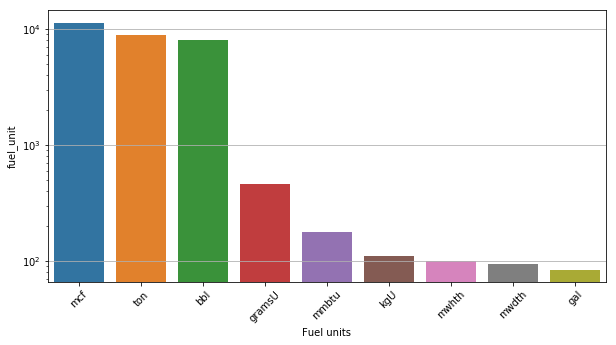

In [40]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.barplot(data=fuel_units, x='fuel_label', y='fuel_unit')
plt.yscale('log')
plt.grid(b=True, axis='y')
plt.xlabel('Fuel units');

In [ ]:
g.set_ylim?

/usr/lib/python3/dist-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


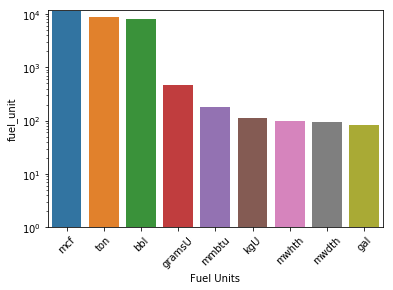

In [36]:
g = sns.barplot(data=fuel_units, x='fuel_label', y='fuel_unit')
g.set_yscale('log')
g.set_ylim(1, 12000)
plt.xticks(rotation=45)
plt.xlabel('Fuel Units');

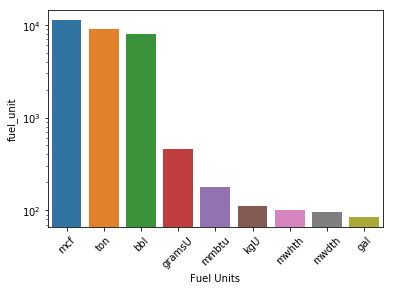

In [41]:
g = sns.barplot(data=fuel_units, x='fuel_label', y='fuel_unit')
g.set_yscale('log')
# g.set_ylim(1, 12000)
plt.xticks(rotation=45)
plt.xlabel('Fuel Units');

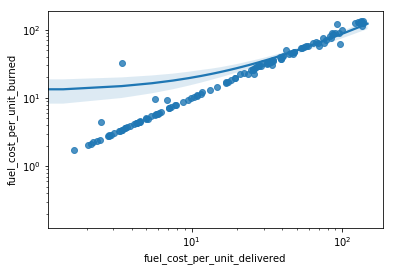

In [27]:
sns.regplot(x=fuel_data.sample(frac=0.005, random_state=4).fuel_cost_per_unit_delivered,
            y=fuel_data.sample(frac=0.005, random_state=4).fuel_cost_per_unit_burned # make sure the random
           )                                             # state seed is same for both axis to ensure 
plt.yscale('log')                                        # correnponing values are used
plt.xscale('log')

In [20]:
x=fuel_data.sample(frac=0.005, random_state=4).fuel_cost_per_unit_delivered
x.index

Int64Index([21607, 23640, 22550,  4027,  9375, 11123, 19813, 11530, 27218,
              553,
            ...
             2958, 13157, 25988,  1026, 11368,  5693, 15577, 13648, 20412,
            11806],
           dtype='int64', length=148)

In [21]:
fuel_data.loc[x.index].fuel_cost_per_unit_burned

21607     11.550
23640      4.950
22550    125.844
4027      26.151
9375      39.427
Name: fuel_cost_per_unit_burned, dtype: float64

In [ ]:
sns.FacetGrid?

## Visualizations for EDA

### (A.) Comparing Categories

<pre><b>    1. Dot plot</b></pre>

In [ ]:
fuel_data.columns

In [ ]:
sns.pointplot?

In [63]:
def y_index(col, func):
    y_index = fuel_data.groupby('fuel_type_code_pudl'
                               )[col].apply(func).sort_values().index

    return y_index

y_index('fuel_qty_burned', np.mean)

Index(['oil', 'waste', 'coal', 'other', 'gas', 'nuclear'], dtype='object', name='fuel_type_code_pudl')

In [78]:
np.median

<function numpy.median(a, axis=None, out=None, overwrite_input=False, keepdims=False)>

In [112]:
(fuel_data.report_year <= 2005).astype(str).head()

0    True
1    True
2    True
3    True
4    True
Name: report_year, dtype: object

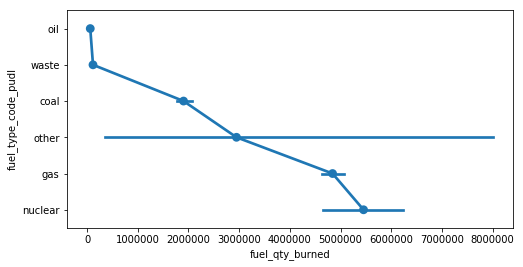

In [117]:
# plot mean of fuel_qty_burned (grouped) by fuel type
y_indx = y_index('fuel_qty_burned', np.mean)
plt.figure(figsize=(8,4))
axes = sns.pointplot(y='fuel_type_code_pudl',
                     x = 'fuel_qty_burned',
                     data = fuel_data,
#                      ci=None,
                     join=True,
                     order=y_indx,
                     estimator=lambda arr: np.mean(arr),
#                      size = lambda arr: arr.median()
                    )
plt.show()

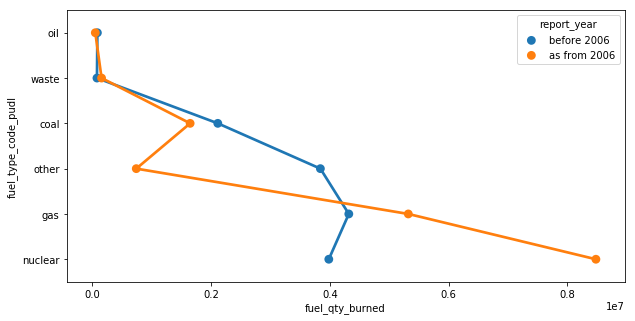

In [119]:
# plot mean of fuel_qty_burned (grouped) by fuel type. Split trace by year of report
y_indx = y_index('fuel_qty_burned', np.mean)
plt.figure(figsize=(10,5))
axes = sns.pointplot(y='fuel_type_code_pudl',
                     x = 'fuel_qty_burned',
                     hue = (fuel_data.report_year <= 2005).astype(str).replace({'True':'before 2006',
                                                                                'False':'as from 2006'
                                                                               }),
                     data = fuel_data,
                     ci=None,
                     join=True,
                     order=y_indx,
                     estimator=lambda arr: np.mean(arr),
#                      size = lambda arr: arr.median()
                    )
plt.show()

In [84]:
!howdoi np.mode numpy

import numpy as np
from scipy import stats

a = np.array([[1, 3, 4, 2, 2, 7],
              [5, 2, 2, 1, 4, 1],
              [3, 3, 2, 2, 1, 1]])

m = stats.mode(a)
print(m)


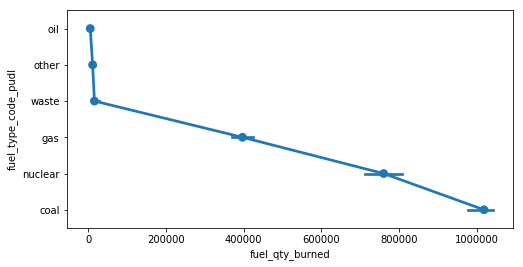

In [82]:
# plot median of fuel_qty_burned (grouped) by fuel type
y_indx = y_index('fuel_qty_burned', np.median)
plt.figure(figsize=(8,4))
axes = sns.pointplot(y='fuel_type_code_pudl',
                     x = 'fuel_qty_burned',
                     data = fuel_data,
#                      ci=None,
                     join=True,
                     order=y_indx,
                     estimator=lambda arr: np.median(arr),
#                      size = lambda arr: arr.median()
                    )
plt.show()

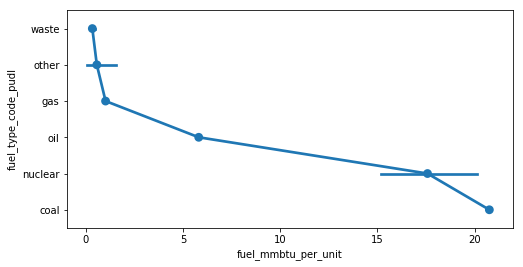

In [88]:
# plot mean of fuel_mmbtu_per_unit (grouped) by fuel type, not controlling for the diff fuel units

y_indx = y_index('fuel_mmbtu_per_unit', np.mean)
plt.figure(figsize=(8,4))
axes = sns.pointplot(y = 'fuel_type_code_pudl',
                     x = 'fuel_mmbtu_per_unit',
                     
                     data = fuel_data,
#                      ci=None,
                     join=True,
                     order=y_indx,
                     estimator=lambda arr: np.mean(arr),
#                      size = lambda arr: arr.median()
                    )
plt.show()

In [91]:
sns.pointplot?

In [135]:
y_indx[[0,1,3,2,5,4]]

Index(['waste', 'other', 'oil', 'gas', 'coal', 'nuclear'], dtype='object', name='fuel_type_code_pudl')

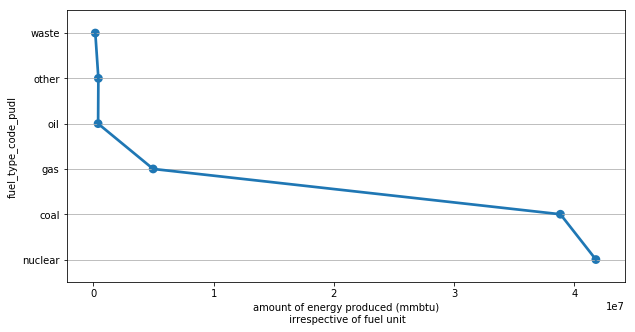

In [147]:
# Dot plot of amount of energy produced normalizing for the different kinds of fuel unit used
y_indx = y_index('fuel_mmbtu_per_unit', np.mean)
y_indx = y_indx[[0,1,3,2,5,4]]   # sort in logical order
plt.figure(figsize=(10,5))
axes = sns.pointplot(y=fuel_data['fuel_type_code_pudl'],
                     x = fuel_data['fuel_mmbtu_per_unit'] * fuel_data['fuel_qty_burned'],
#                      data = fuel_data,
                     ci=None,
                     join=True,
                     order=y_indx,
                     estimator=lambda arr: arr.mean(),
                     size = lambda arr: arr.median()
                    )
plt.grid(b=True, axis='y')
plt.xlabel('amount of energy produced (mmbtu)\n irrespective of fuel unit')
plt.show()      #### Notice that withoutcontrolling for unit, the maount of energy generated from coal
                #### see to be higher than from nuclear fuel.  There is a reversal when units are normalized

In [6]:
# Dot plot of amount of energy produced normalizing for the different kinds of fuel unit used
# and splitting the trace according to time frame
y_indx = y_index('fuel_mmbtu_per_unit', np.mean)
y_indx = y_indx[[0,1,3,2,5,4]]
plt.figure(figsize=(10,5))
axes = sns.pointplot(y=fuel_data['fuel_type_code_pudl'],
                     x = fuel_data['fuel_mmbtu_per_unit'] * fuel_data['fuel_qty_burned'],
                     hue = (fuel_data.report_year <= 2005).astype(str).replace({'True':'before 2006',
                                                                                'False':'as from 2006'
                                                                               }),
#                      data = fuel_data,
                     ci=None,
                     join=True,
                     order=y_indx,
                     estimator=lambda arr: arr.mean(),
                     size = lambda arr: arr.median()
                    )
plt.grid(b=True, axis='y')
plt.xlabel('amount of energy produced (mmbtu)\n irrespective of fuel unit')
plt.show()

NameError: name 'y_index' is not defined

In [150]:
!howdoi dot plot pandas

df.plot(style='.-')


In [189]:
!howdoi matplotlib axes object 

XAxis


<pre><b>    2. Bar plot</b></pre>

<pre>df.groupby('species').mean().plot.bar()</pre>

In [209]:
fuel_data.columns[[7,8,9]]

Index(['fuel_mmbtu_per_unit', 'fuel_cost_per_unit_burned',
       'fuel_cost_per_unit_delivered'],
      dtype='object')

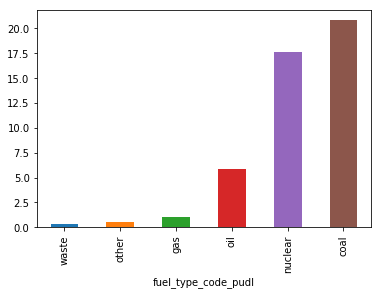

In [215]:
fuel_data.groupby('fuel_type_code_pudl')[fuel_data.columns[7]].mean().sort_values().plot.bar();

<pre><b>    3. Floating Bar chart (Gantt chart)</b></pre>

# YOU CAN ITERATE OVER A groupby object !!!

In [217]:
from datetime import datetime
# import pandas as pd
# import matplotlib.pyplot as plt
import matplotlib.dates as dt

df = pd.read_csv('data.csv')
df.amin = pd.to_datetime(df.amin).astype(datetime)
df.amax = pd.to_datetime(df.amax).astype(datetime)

fig = plt.figure()
ax = fig.add_subplot(111)
ax = ax.xaxis_date()
ax = plt.hlines(df.index, dt.date2num(df.amin), dt.date2num(df.amax))


FileNotFoundError: File b'data.csv' does not exist

In [306]:
fuel_data.groupby('fuel_type_code_pudl').fuel_mmbtu_per_unit.min()

fuel_type_code_pudl
coal       10.168000
gas         0.827100
nuclear     0.000001
oil         3.103044
other       0.000048
waste       0.000009
Name: fuel_mmbtu_per_unit, dtype: float64

In [284]:
df = pd.DataFrame([], columns=['Min', 'Max'])
for i, group in (fuel_data.groupby('fuel_type_code_pudl')):
    df.loc[i] = [group.fuel_mmbtu_per_unit.min(),
                 group.fuel_mmbtu_per_unit.max()
                ]

df = df.reset_index().rename(columns={'index':'Fuel'}).sort_values('Max')
df

,Fuel,Min,Max
1,gas,0.827100,1.199200
3,oil,3.103044,6.812190
5,waste,0.000009,8.700000
0,coal,10.168000,28.926390
4,other,0.000048,81.910118
2,nuclear,0.000001,341.260000


In [280]:
fuel_cost_per_mmbtu

In [293]:
df2 = pd.DataFrame([], columns=['Min', 'Max'])
for i, group in (fuel_data.groupby('fuel_type_code_pudl')):
    df2.loc[i] = [group.fuel_cost_per_mmbtu.min(),
                 group.fuel_cost_per_mmbtu.max()
                ]

df2 = df2.reset_index().rename(columns={'index':'Fuel'}).sort_values('Max')
df2

,Fuel,Min,Max
0,coal,0.500,6.89500
3,oil,5.000,33.00000
1,gas,1.005,34.97479
2,nuclear,0.000,107.00000
4,other,-5.750,3515.92400
5,waste,-41.501,359278.00000


In [286]:
go.Bar?

In [288]:
go.bar.Marker?

In [1]:
fig = go.Figure()
trace = go.Bar(x=df.Max,
               y=df.Fuel,
               base=df.Max,
               orientation='h',
              )

fig.add_trace(trace)
fig.show()

NameError: name 'go' is not defined

In [ ]:
import plotly.graph_objects as go

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig = go.Figure()
fig.add_trace(go.Bar(
    x=months,
    y=[20, 14, 25, 16, 18, 22, 19, 15, 12, 16, 14, 17],
    name='Primary Product',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=months,
    y=[19, 14, 22, 14, 16, 19, 15, 14, 10, 12, 12, 16],
    name='Secondary Product',
    marker_color='lightsalmon'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

In [ ]:
sns.boxplot( y=df["species"], x=df["sepal_length"] );
plt.show()

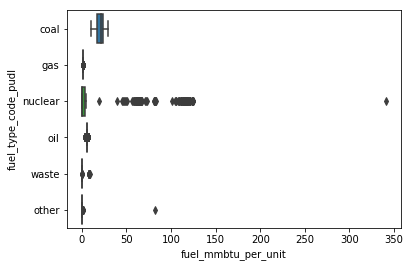

In [311]:
sns.boxplot(x='fuel_mmbtu_per_unit', y='fuel_type_code_pudl', data=fuel_data)
plt.figure(figsize=(20,10));
# plt.show();